<a href="https://colab.research.google.com/github/GrainSack/ML/blob/main/House_pricing_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import&Data check







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter

In [ ]:
plt.style.use('seaborn')
sns.set(font_scale = 1.5)
import missingno as msno

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
os.listdir("/content/drive/MyDrive/house")

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [ ]:
df_train =  pd.read_csv("/content/drive/MyDrive/house/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/house/test.csv")

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [ ]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("#of Numerical features : " ,len(numerical_feats))
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("#of Categorical features :" , len(categorical_feats))

#of Numerical features :  38
#of Categorical features : 43


In [ ]:
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

##Anomal data Detection

###IQR method

For each category, take Average measure for calssify Irrugular data or not

Common typical Model split whole range for uniform Quantile Range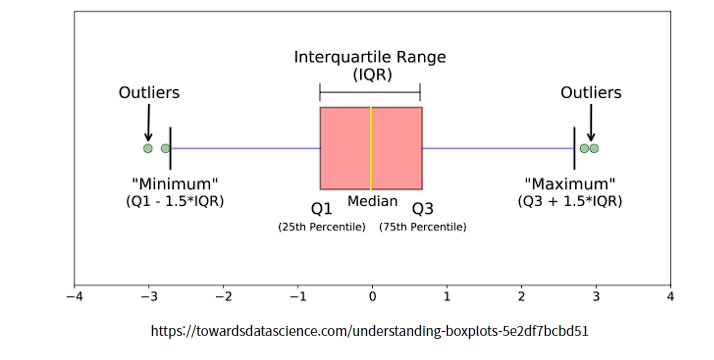

In [ ]:
def detect_outliers(df,n, features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outlier_list_col = df[(df[col]<Q1-outlier_step) | (df[col]>Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(k for k ,v in outlier_indices.items() if v > n)
  return multiple_outliers

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
Outliers_to_drop = detect_outliers(df_train, 2, df_train[numerical_feats].columns[:-1])

In [ ]:
df_train.loc[Outliers_to_drop]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500
165,166,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,127500
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,1351,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,200000
634,635,90,RL,64.0,6979,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
910,911,90,RL,80.0,11600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,154300
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500


In [ ]:
df_train = df_train.drop(Outliers_to_drop,axis = 0).reset_index(drop = True)
df_train.shape

(1338, 81)

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##Check NAN value

In [ ]:
for col in df_train.columns:
  msperc = 'column : {:>10} \t percent of NaN value : {:.2f}'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msperc)

column :         Id 	 percent of NaN value : 0.00
column : MSSubClass 	 percent of NaN value : 0.00
column :   MSZoning 	 percent of NaN value : 0.00
column : LotFrontage 	 percent of NaN value : 17.74
column :    LotArea 	 percent of NaN value : 0.00
column :     Street 	 percent of NaN value : 0.00
column :      Alley 	 percent of NaN value : 93.77
column :   LotShape 	 percent of NaN value : 0.00
column : LandContour 	 percent of NaN value : 0.00
column :  Utilities 	 percent of NaN value : 0.00
column :  LotConfig 	 percent of NaN value : 0.00
column :  LandSlope 	 percent of NaN value : 0.00
column : Neighborhood 	 percent of NaN value : 0.00
column : Condition1 	 percent of NaN value : 0.00
column : Condition2 	 percent of NaN value : 0.00
column :   BldgType 	 percent of NaN value : 0.00
column : HouseStyle 	 percent of NaN value : 0.00
column : OverallQual 	 percent of NaN value : 0.00
column : OverallCond 	 percent of NaN value : 0.00
column :  YearBuilt 	 percent of NaN value

In [ ]:
for col in df_test.columns:
  msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msperc)

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 92.67%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.14%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

<AxesSubplot:>

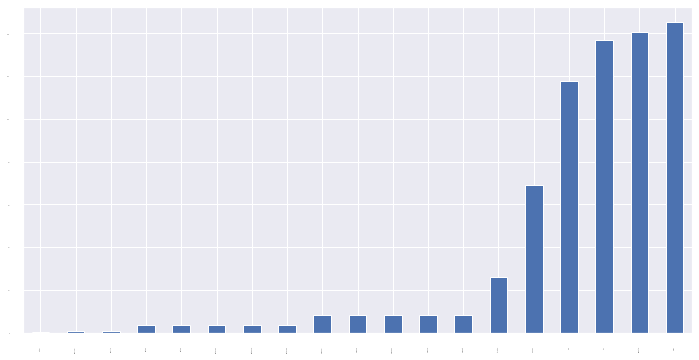

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

##Check Skewness and Kurtosis

In [ ]:
for col in numerical_feats:
  print('{:15}'.format(col),'Skewness:{:05.2f}'.format(df_train[col].skew()),'  ', 'Kurtosis:{:06.2f}'.format(df_train[col].kurt()))

Id              Skewness:00.00    Kurtosis:-01.19
MSSubClass      Skewness:01.37    Kurtosis:001.49
LotFrontage     Skewness:01.59    Kurtosis:013.04
LotArea         Skewness:07.78    Kurtosis:123.55
OverallQual     Skewness:00.16    Kurtosis:-00.05
OverallCond     Skewness:00.74    Kurtosis:001.23
YearBuilt       Skewness:-0.58    Kurtosis:-00.60
YearRemodAdd    Skewness:-0.52    Kurtosis:-01.27
MasVnrArea      Skewness:02.69    Kurtosis:011.04
BsmtFinSF1      Skewness:00.65    Kurtosis:-00.50
BsmtFinSF2      Skewness:04.86    Kurtosis:026.86
BsmtUnfSF       Skewness:00.87    Kurtosis:000.29
TotalBsmtSF     Skewness:00.29    Kurtosis:001.17
1stFlrSF        Skewness:00.66    Kurtosis:000.02
2ndFlrSF        Skewness:00.77    Kurtosis:-00.80
LowQualFinSF    Skewness:12.74    Kurtosis:170.50
GrLivArea       Skewness:00.66    Kurtosis:000.54
BsmtFullBath    Skewness:00.56    Kurtosis:-00.96
BsmtHalfBath    Skewness:04.91    Kurtosis:024.68
FullBath        Skewness:-0.05    Kurtosis:-01.25


#EDA

##Correlation Heat Map

-stduy of MultColarisity

<AxesSubplot:title={'center':'Correlation of Numerical Features with Sale Price'}>

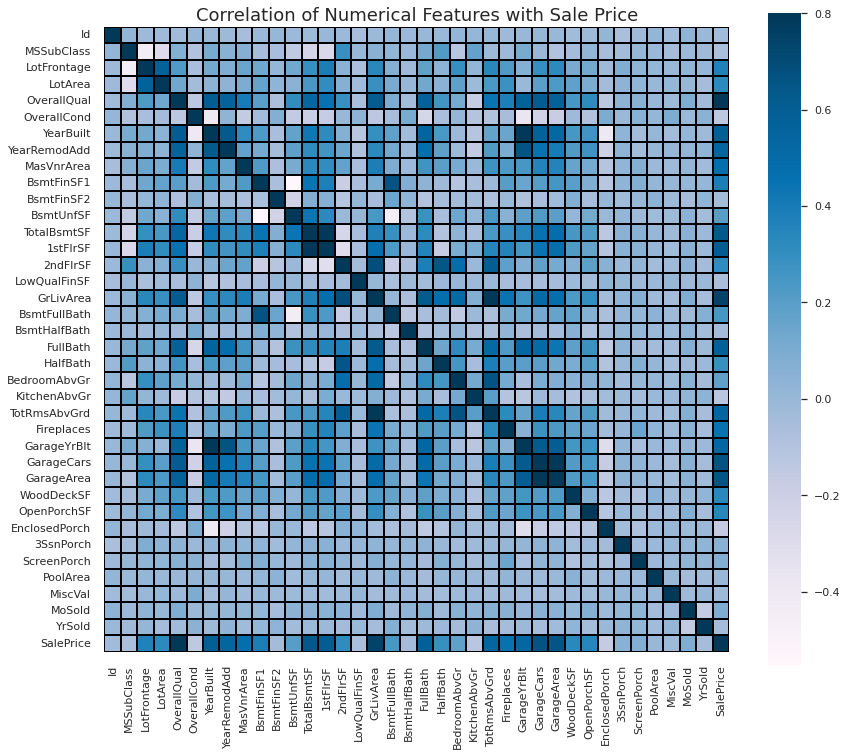

In [ ]:
corr_data = df_train[df_train.columns]

colormap = plt.cm.PuBu
sns.set(font_scale = 1.0)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numerical Features with Sale Price', y=1, size = 18)
sns.heatmap(corr_data.corr(),square = True, linewidths= 0.1, cmap = colormap, linecolor = 'black',vmax = 0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
       'YearRemodAdd'],
      dtype='object')


<AxesSubplot:>

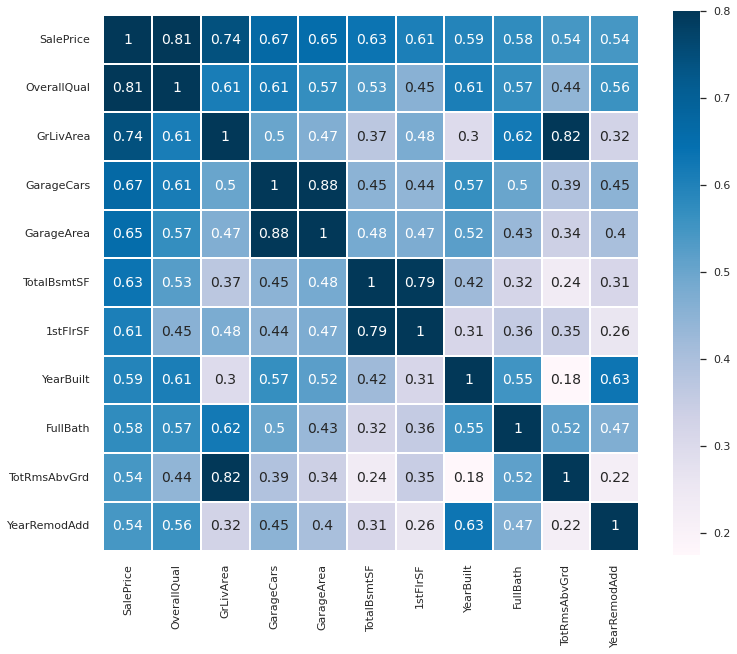

In [ ]:
k= 11
cols = corr_data.corr().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
df_2 =df_train[cols].corr()
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(df_2, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

##Pair Plot

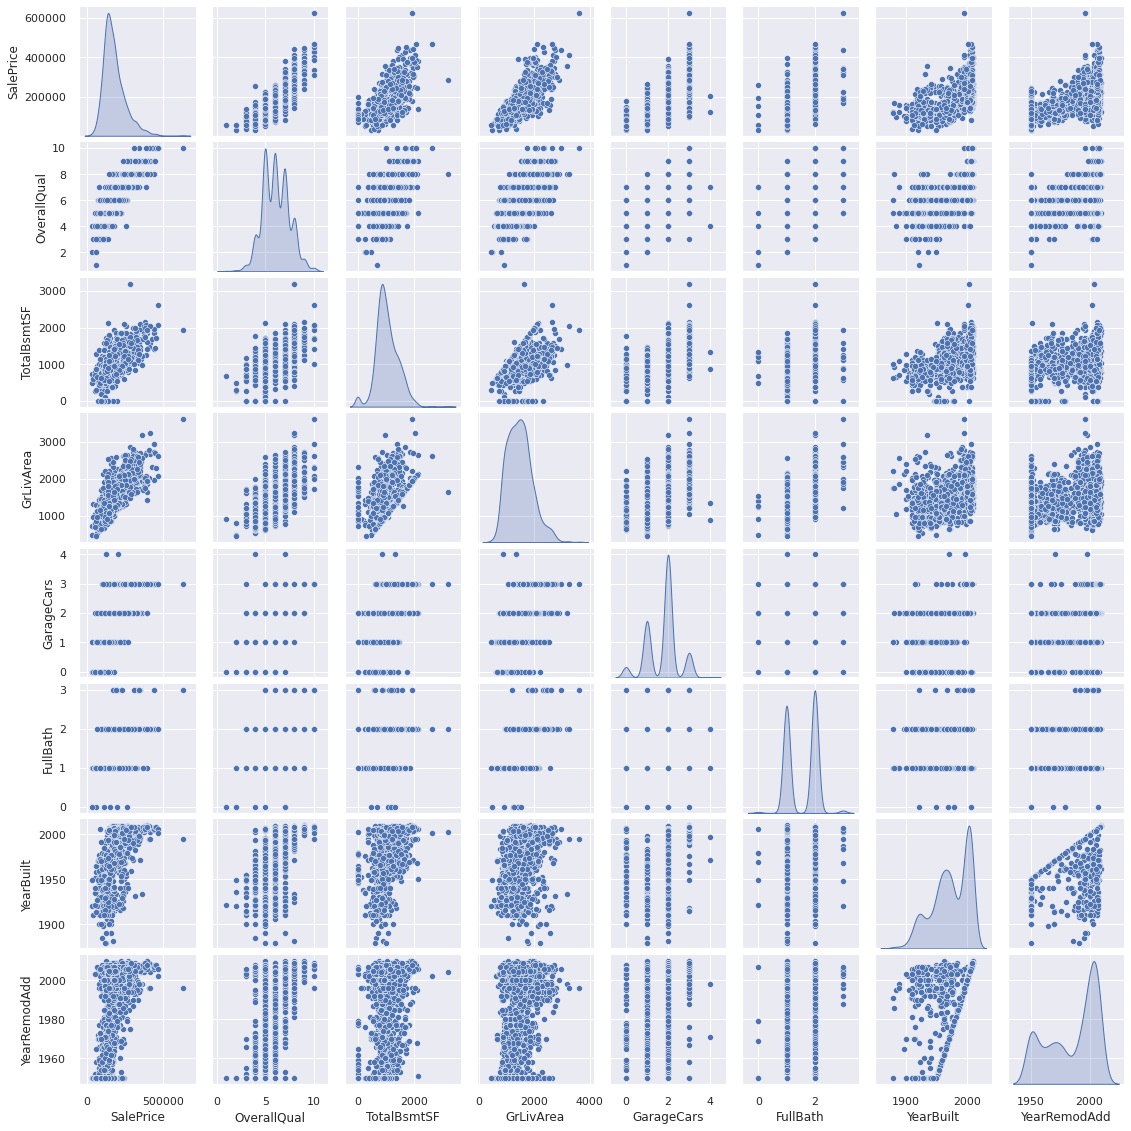

In [ ]:
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(df_train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

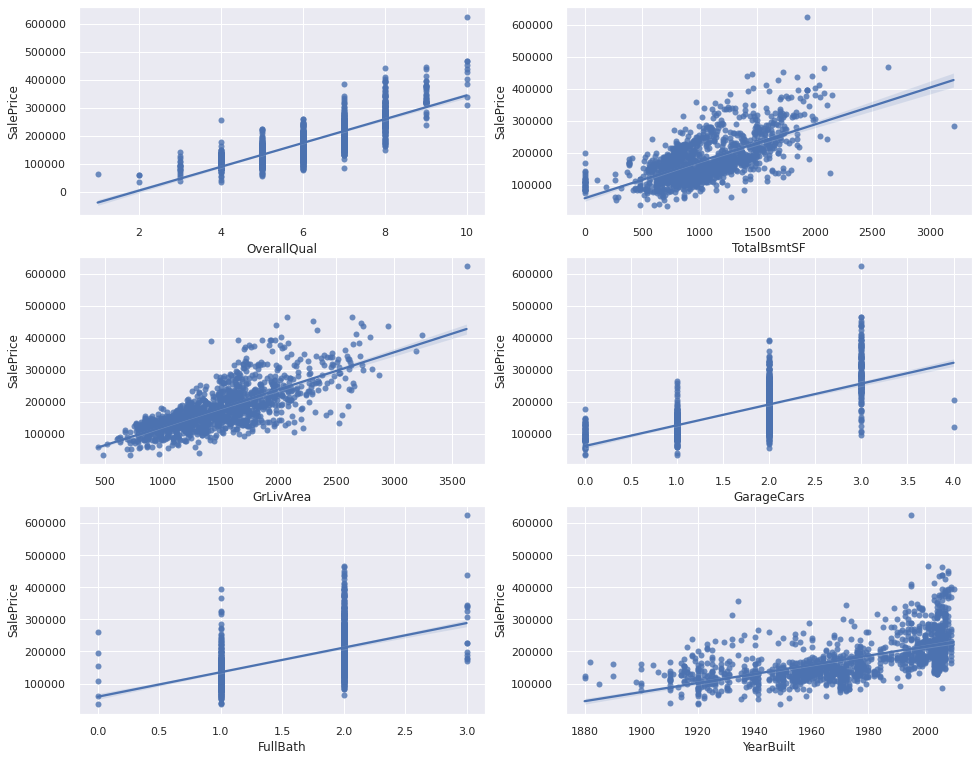

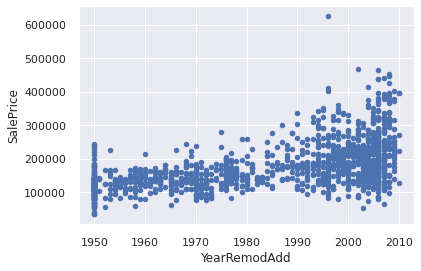

In [ ]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))
OverallQual_scatter_plot = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageCars_scatter_plot = pd.concat([df_train['SalePrice'],df_train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([df_train['SalePrice'],df_train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

##Categorical Feature

In [ ]:
for catg in list(categorical_feats):
  print(df_train[catg].value_counts())
  print("*"*50)

RL         1055
RM          197
FV           65
RH           14
C (all)       7
Name: MSZoning, dtype: int64
**************************************************
Pave    1335
Grvl       3
Name: Street, dtype: int64
**************************************************
Grvl    42
Pave    37
Name: Alley, dtype: int64
**************************************************
Reg    859
IR1    440
IR2     32
IR3      7
Name: LotShape, dtype: int64
**************************************************
Lvl    1211
Bnk      52
HLS      48
Low      27
Name: LandContour, dtype: int64
**************************************************
AllPub    1338
Name: Utilities, dtype: int64
**************************************************
Inside     972
Corner     235
CulDSac     81
FR2         46
FR3          4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1275
Mod      56
Sev       7
Name: LandSlope, dtype: int64
**************************************************
NAmes      20

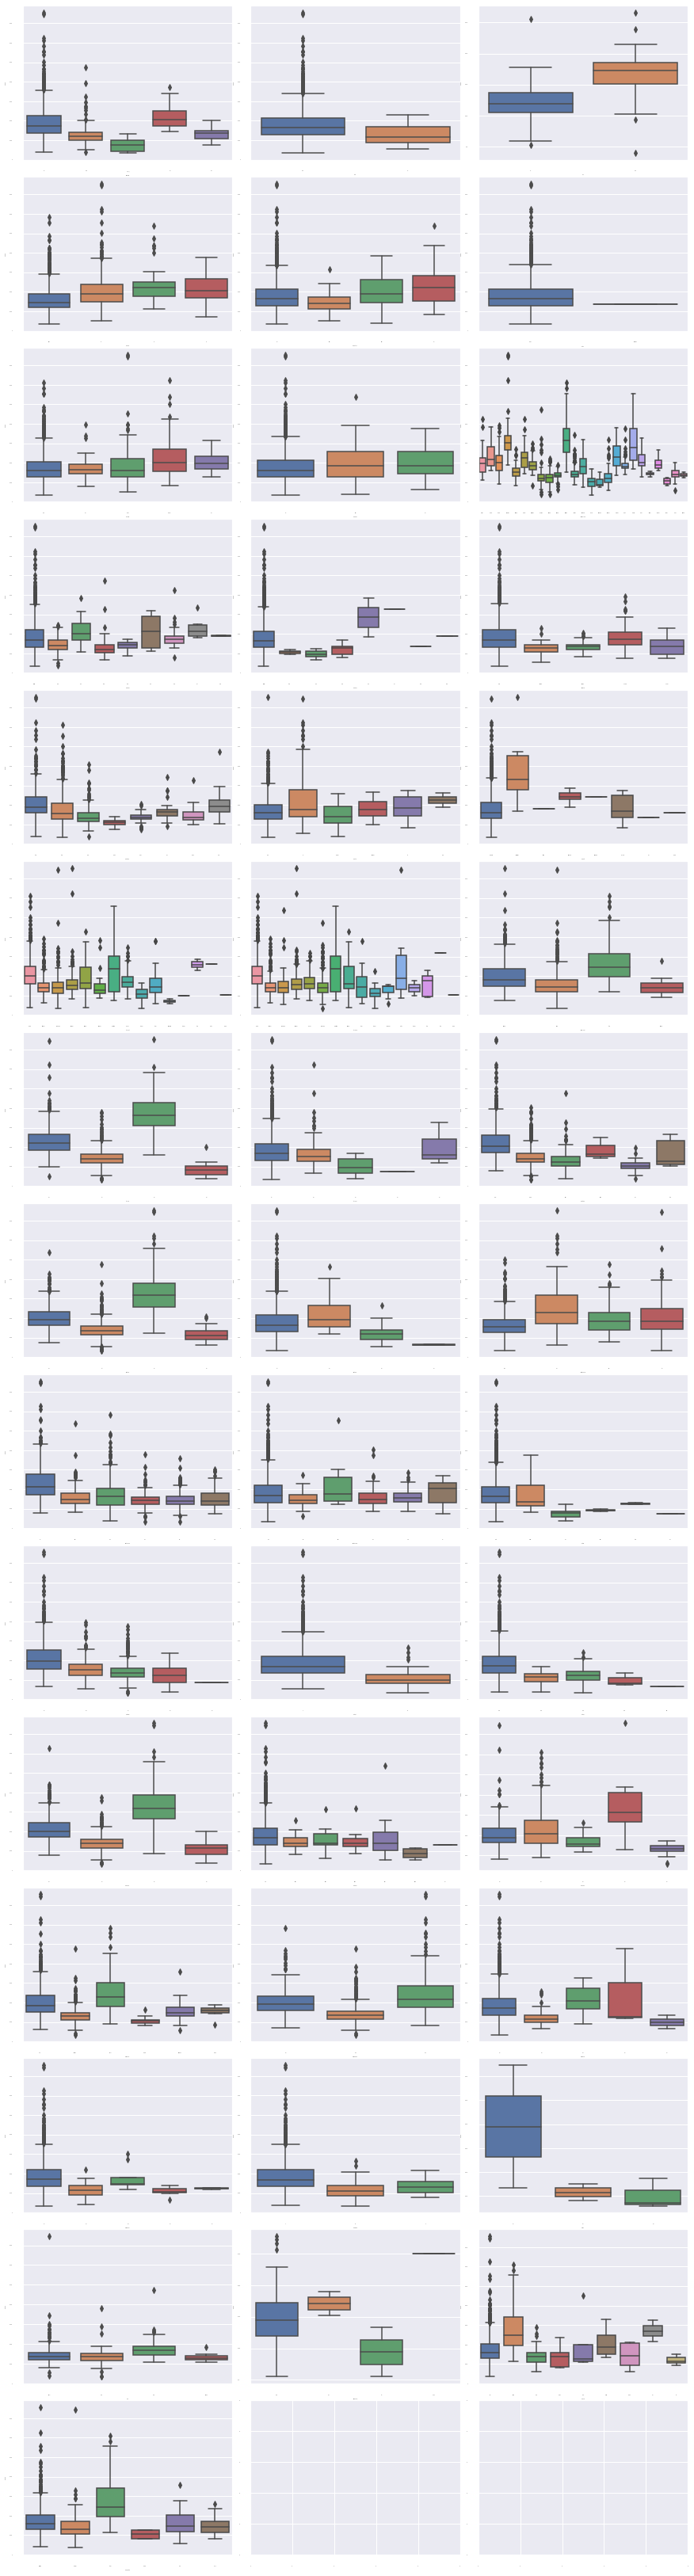

In [ ]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
sns.set(font_scale = 0.01)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df_train["SalePrice"], data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()

In [ ]:
#Split weak and strong corr
num_strong_corr = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars',
                   'FullBath','YearBuilt','YearRemodAdd']

num_weak_corr = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'BsmtFullBath',
                 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF','OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual',
                    'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#Feature Engineering

Skewness: 1.882876
Kurtosis: 6.536282


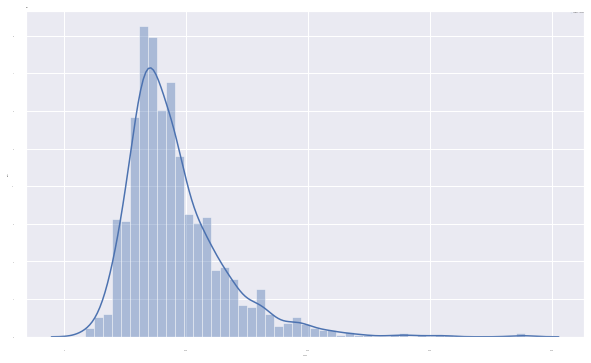

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["SalePrice"], color = "b", label="Skewness: {:2f}".format(df_train["SalePrice"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


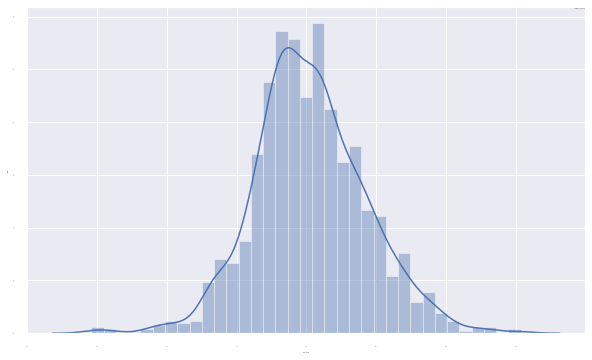

In [ ]:
#Log normal operator
df_train["SalePrice_Log"] = df_train["SalePrice"].map(lambda i:np.log(i) if i>0 else 0)

f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["SalePrice_Log"], color = "b", label="Skewness: {:2f}".format(df_train["SalePrice_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % df_train['SalePrice_Log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_Log'].kurt())

df_train.drop('SalePrice', axis= 1, inplace=True)

In [ ]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [ ]:
#NaN value eotls None(없다) 로 대체체
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


In [ ]:
#Numerical category 에 대한 결측지를 평균값으로 대체 이휴 missing data 확인
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [ ]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#Correlation 이 weak 한 feature 들을 삭제제
id_test = df_test['Id']

to_drop_num  = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [ ]:
df_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,GarageCars,SaleType,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,Gd,Gd,856,Y,SBrkr,1710,2,Gd,2,WD,12.247694
1,RL,Veenker,Norm,6,1976,1976,None,TA,Gd,1262,Y,SBrkr,1262,2,TA,2,WD,12.109011
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,Gd,Gd,920,Y,SBrkr,1786,2,Gd,2,WD,12.317167
3,RL,Crawfor,Norm,7,1915,1970,None,TA,TA,756,Y,SBrkr,1717,1,Gd,3,WD,11.849398
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,2198,2,Gd,3,WD,12.429216


##Categorical data to Numerical data

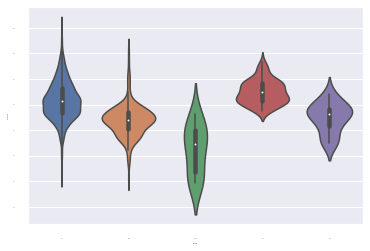

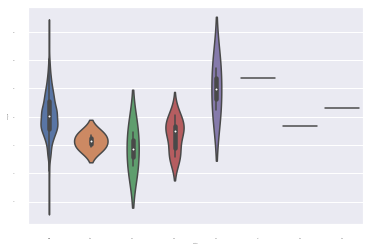

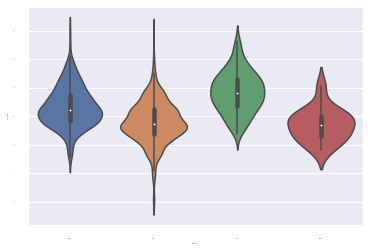

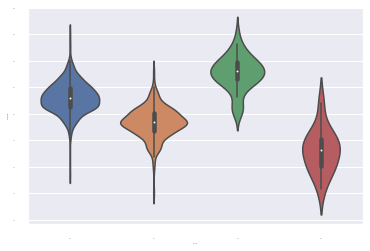

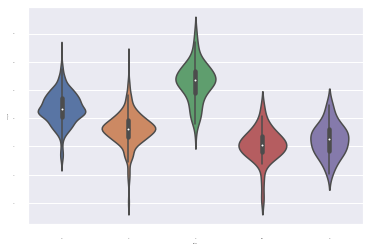

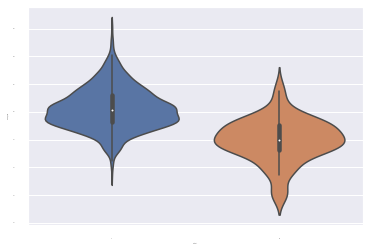

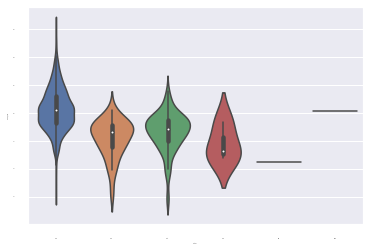

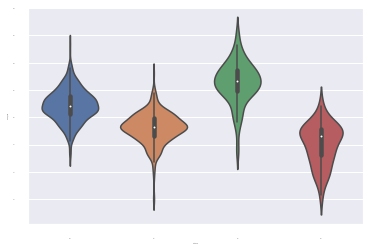

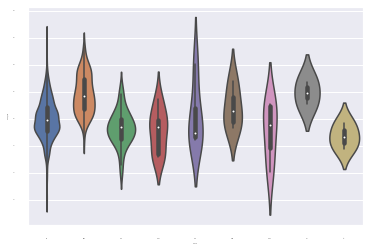

In [ ]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    sns.violinplot(x=catg, y=df_train["SalePrice_Log"], data=df_train)
    plt.show()

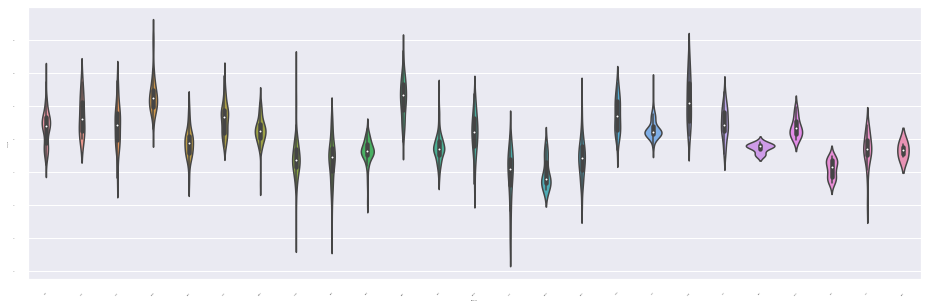

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=df_train["SalePrice_Log"], data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [ ]:
for catg in catg_list :
    g = df_train.groupby(catg)["SalePrice_Log"].mean()
    print(g)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025895
PosA      12.691580
PosN      12.493879
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.425138
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.764044
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.640394
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061090
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061464
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.633614
F

In [ ]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [ ]:
for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4 

<AxesSubplot:title={'center':'Correlation of New Features'}>

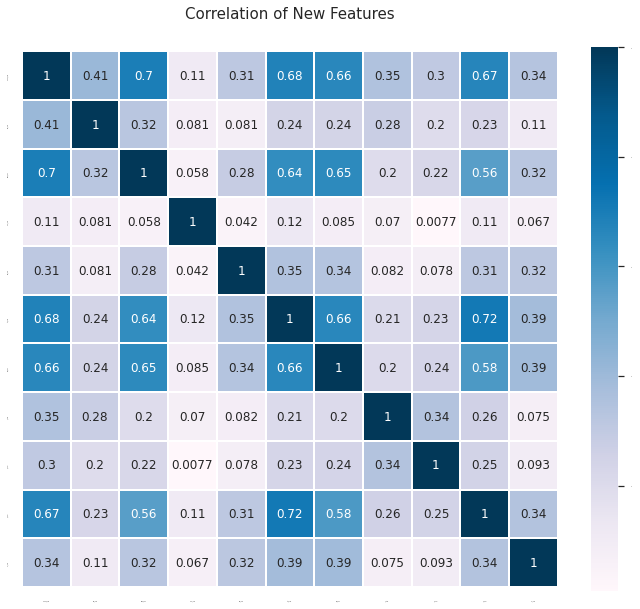

In [ ]:
new_col_HM = df_train[['SalePrice_Log', 'MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']]

colormap = plt.cm.PuBu
plt.figure(figsize=(12, 10))
plt.title("Correlation of New Features", y = 1.05, size = 15)
sns.heatmap(new_col_HM.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12})

In [ ]:
#Drop Weak Correlation
df_train.drop(['MSZoning','Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)
df_test.drop(['MSZoning', 'Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType', 'Cond2_num', 'Mas_num', 'CA_num', 'Elc_num', 'SlTy_num'], axis = 1, inplace = True)

In [ ]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,7,2003,2003,856,1710,2,2,12.247694,3,2,3,2,3
1,6,1976,1976,1262,1262,2,2,12.109011,3,2,2,2,2
2,7,2001,2002,920,1786,2,2,12.317167,3,2,3,2,3
3,7,1915,1970,756,1717,1,3,11.849398,3,2,2,1,3
4,8,2000,2000,1145,2198,2,3,12.429216,3,3,3,2,3


In [ ]:
df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,5,1961,1961,882.0,896,1,1.0,2,1,2,1,2
1,6,1958,1958,1329.0,1329,1,1.0,3,1,2,1,3
2,5,1997,1998,928.0,1629,2,2.0,3,2,2,2,2
3,6,1998,1998,926.0,1604,2,2.0,3,2,2,1,3
4,8,1992,1992,1280.0,1280,2,2.0,3,3,3,2,3


#Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df_train.drop("SalePrice_Log", axis = 1).values
target_label = df_train["SalePrice_Log"].values
X_test = df_test.values
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.2, random_state = 2000)

In [ ]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(X_tr,y_tr)

[10:30:50] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4603, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.8, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, ntrhead=-1, num_parallel_tree=None,
             predictor=None, ...)

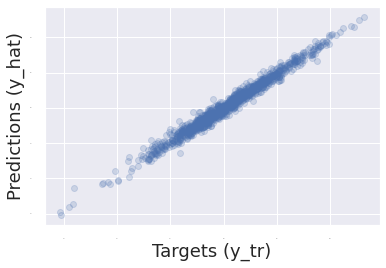

In [ ]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [ ]:
regressor.score(X_tr,y_tr)

0.9785098037647731

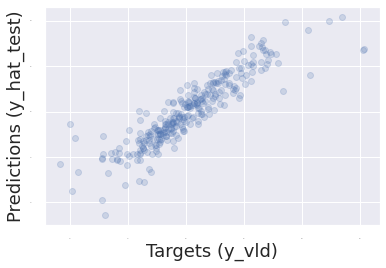

In [ ]:
y_hat_test = regressor.predict(X_vld)


plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [ ]:
regressor.score(X_vld,y_vld)

0.8153440816263037

##K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 10)

[10:31:05] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:07] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:08] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:09] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:09] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:10] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:13] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:14] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:15] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.

[10:31:16] WARNING: ../src/learner.cc:767: 
Parameters: { "ntrhead" } are not used.



In [ ]:
use_logvals = 1

pred_xgb = regressor.predict(X_test)

sub_xgb = pd.DataFrame()
sub_xgb['Id'] = id_test
sub_xgb['SalePrice'] = pred_xgb

if use_logvals == 1:
    sub_xgb['SalePrice'] = np.exp(sub_xgb['SalePrice']) 

sub_xgb.to_csv('xgb.csv',index=False)

In [ ]:
pred_xgb

array([11.578029, 11.91191 , 12.041268, ..., 11.916255, 11.558527,
       12.22994 ], dtype=float32)

In [ ]:
tt = np.exp(pred_xgb)
tt

array([106726.914, 149031.06 , 169611.94 , ..., 149680.02 , 104665.73 ,
       204830.98 ], dtype=float32)

In [ ]:
sub_xgb

,Id,SalePrice
0,1461,106726.914062
1,1462,149031.062500
2,1463,169611.937500
3,1464,176078.437500
4,1465,193225.031250
...,...,...
1454,2915,76833.960938
1455,2916,83251.171875
1456,2917,149680.015625
1457,2918,104665.726562
